In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

sfantu gheorghe ro
tuktoyaktuk ca
bluff nz
mys shmidta ru
codrington ag
puerto ayora ec
omboue ga
vaini to
hermanus za
port elizabeth za
mantua cu
tiarei pf
ilulissat gl
dranceni sat ro
east london za
awassa et
coquimbo cl
albany au
touros br
veraval in
rikitea pf
puerto varas cl
rehoboth na
punta arenas cl
puerto ayora ec
mabai cn
qaanaaq gl
port elizabeth za
sulmona it
dikson ru
cabo san lucas mx
orsha by
ugoofaaru mv
lebu cl
ushuaia ar
maragheh ir
punta arenas cl
tura ru
chuy uy
hermanus za
barentsburg sj
ifakara tz
vaitupu wf
kununurra au
tacarigua ve
qaanaaq gl
castro cl
tsihombe mg
kapaa us
punta arenas cl
umzimvubu za
ushuaia ar
gravdal no
ushuaia ar
nanortalik gl
vaini to
artyom az
lorengau pg
deming us
hobart au
kahului us
qaanaaq gl
rikitea pf
cherskiy ru
toungoo mm
bathsheba bb
vidim ru
rikitea pf
arraial do cabo br
casablanca ma
kismayo so
kalaleh ir
hobart au
vila do maio cv
antofagasta cl
forestville ca
najran sa
tabou ci
masallatah ly
quilmana pe
mar del plata ar
ponta d

cape town za
belushya guba ru
port lincoln au
barrow us
port alfred za
shellbrook ca
albany au
necochea ar
vaitupu wf
belushya guba ru
flinders au
bad ems de
karratha au
kapaa us
nizhneyansk ru
punta arenas cl
namibe ao
barcelona ve
lavrentiya ru
port elizabeth za
umm lajj sa
sola vu
jining cn
osypenko ua
izhma ru
rikitea pf
avarua ck
cuiluan cn
marsh harbour bs
mataura pf
lagoa pt
abu samrah qa
belushya guba ru
punta arenas cl
wanning cn
moroni km
lompoc us
hualmay pe
upata ve
anadyr ru
krasnoselkup ru
tuktoyaktuk ca
vila vu
tuatapere nz
nanortalik gl
santona es
waipawa nz
attawapiskat ca
vaini to
atuona pf
kapaa us
mataura pf
faanui pf
pangnirtung ca
rikitea pf
punta arenas cl
pangnirtung ca
hella is
cape town za
bantry ie
constitucion mx
saskylakh ru
mahebourg mu
alcantara br
rikitea pf
ushuaia ar
mar del plata ar
cape town za
bluff nz
khatanga ru
port elizabeth za
matadi cd
clyde river ca
richards bay za
samusu ws
qaanaaq gl
punta arenas cl
albany au
vaitupu wf
chokurdakh ru
narsaq

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c66c90587bd629e14b26342be609984f


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sfantu gheorghe
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | omboue
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | mantua
Processing Record 12 of Set 1 | tiarei
Processing Record 13 of Set 1 | ilulissat
Processing Record 14 of Set 1 | dranceni sat
City not found. Skipping...
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | awassa
Processing Record 17 of Set 1 | coquimbo
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | veraval
Processing Record 21 of Set 1 | rikitea
Processing Record 2

City not found. Skipping...
Processing Record 39 of Set 4 | harper
Processing Record 40 of Set 4 | nouadhibou
Processing Record 41 of Set 4 | kaitangata
Processing Record 42 of Set 4 | khash
Processing Record 43 of Set 4 | tiznit
Processing Record 44 of Set 4 | mawlaik
Processing Record 45 of Set 4 | tuggurt
City not found. Skipping...
Processing Record 46 of Set 4 | upernavik
Processing Record 47 of Set 4 | mount isa
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | fortuna
Processing Record 50 of Set 4 | taltal
Processing Record 1 of Set 5 | kalamare
Processing Record 2 of Set 5 | verkhnevilyuysk
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | bargal
City not found. Skipping...
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | zhigansk
Processing Record 8 of Set 5 | tena
Processing Record 9 of Set 5 | nguiu
City not found. Skipping...
Processing Record 10 of Set 5 | auki
Proc

Processing Record 28 of Set 8 | zabaykalsk
Processing Record 29 of Set 8 | amderma
City not found. Skipping...
Processing Record 30 of Set 8 | namatanai
Processing Record 31 of Set 8 | lekoni
Processing Record 32 of Set 8 | cayenne
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | bestobe
Processing Record 36 of Set 8 | bobcaygeon
Processing Record 37 of Set 8 | mananjary
Processing Record 38 of Set 8 | marawi
Processing Record 39 of Set 8 | phek
Processing Record 40 of Set 8 | kawambwa
Processing Record 41 of Set 8 | savinka
Processing Record 42 of Set 8 | sao filipe
Processing Record 43 of Set 8 | csepreg
Processing Record 44 of Set 8 | irituia
Processing Record 45 of Set 8 | conde
Processing Record 46 of Set 8 | waingapu
Processing Record 47 of Set 8 | jurado
Processing Record 48 of Set 8 | bintulu
Processing Record 49 of Set 8 | changping
Processing Record 50 of Set 8 | cam pha
City not found. Skipping...
Processing Reco

Processing Record 17 of Set 12 | noumea
Processing Record 18 of Set 12 | monrovia
Processing Record 19 of Set 12 | champerico
Processing Record 20 of Set 12 | nago
Processing Record 21 of Set 12 | elizabeth city
Processing Record 22 of Set 12 | saint anthony
Processing Record 23 of Set 12 | jinchang
Processing Record 24 of Set 12 | sao geraldo do araguaia
Processing Record 25 of Set 12 | arroio grande
Processing Record 26 of Set 12 | newala
Processing Record 27 of Set 12 | los llanos de aridane
Processing Record 28 of Set 12 | hovd
Processing Record 29 of Set 12 | sechura
Processing Record 30 of Set 12 | alta gracia
Processing Record 31 of Set 12 | pasighat
Processing Record 32 of Set 12 | ijaki
City not found. Skipping...
Processing Record 33 of Set 12 | limon
Processing Record 34 of Set 12 | lucapa
Processing Record 35 of Set 12 | alindao
Processing Record 36 of Set 12 | vanavara
Processing Record 37 of Set 12 | mayskiy
Processing Record 38 of Set 12 | obo
Processing Record 39 of Set

In [11]:
# Print the city data to confirm sufficient count.
len(city_data)

562

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sfantu Gheorghe,45.87,25.78,59.00,88,0,0.47,RO,2020-08-22 02:18:05
1,Tuktoyaktuk,69.45,-133.04,55.40,76,20,13.87,CA,2020-08-22 02:18:05
2,Bluff,-46.60,168.33,55.00,75,0,8.99,NZ,2020-08-22 02:18:05
3,Codrington,-38.27,141.97,51.89,71,79,25.61,AU,2020-08-22 02:18:06
4,Puerto Ayora,-0.74,-90.35,66.99,89,62,5.99,EC,2020-08-22 02:18:06
5,Omboue,-1.57,9.26,74.03,79,100,4.90,GA,2020-08-22 02:18:06
6,Vaini,-21.20,-175.20,80.60,83,40,6.93,TO,2020-08-22 02:13:36
7,Hermanus,-34.42,19.23,42.01,96,0,2.19,ZA,2020-08-22 02:18:07
8,Port Elizabeth,-33.92,25.57,50.00,87,14,3.36,ZA,2020-08-22 02:18:07
9,Mantua,45.17,10.78,73.99,81,0,1.99,IT,2020-08-22 02:14:27


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sfantu Gheorghe,RO,2020-08-22 02:18:05,45.87,25.78,59.00,88,0,0.47
1,Tuktoyaktuk,CA,2020-08-22 02:18:05,69.45,-133.04,55.40,76,20,13.87
2,Bluff,NZ,2020-08-22 02:18:05,-46.60,168.33,55.00,75,0,8.99
3,Codrington,AU,2020-08-22 02:18:06,-38.27,141.97,51.89,71,79,25.61
4,Puerto Ayora,EC,2020-08-22 02:18:06,-0.74,-90.35,66.99,89,62,5.99
...,...,...,...,...,...,...,...,...,...
557,Dzheyrakh,RU,2020-08-22 02:16:10,42.82,44.68,60.80,93,100,4.47
558,Marietta,US,2020-08-22 02:16:21,33.95,-84.55,69.80,94,75,3.36
559,Palaikastron,GR,2020-08-22 02:20:14,35.20,26.25,80.01,54,0,20.00
560,Ballina,AU,2020-08-22 02:20:14,-28.87,153.57,68.00,39,40,18.34


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

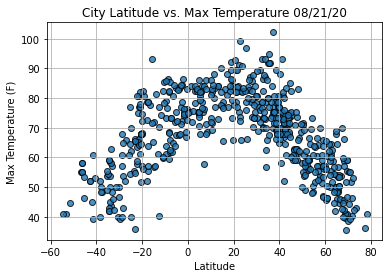

In [19]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

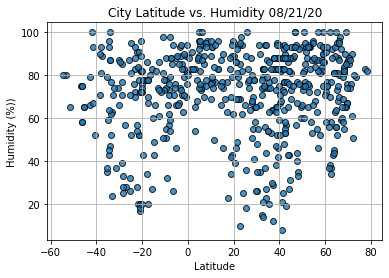

In [20]:

# Build the scatter plot for latitude vs. humdidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

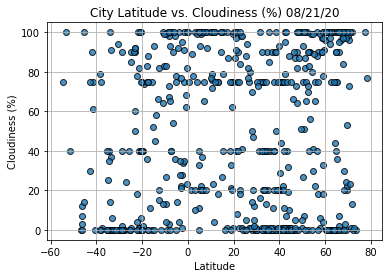

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

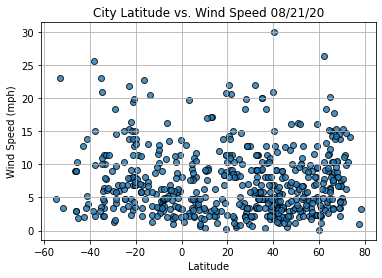

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()